Name : - Kunal Mody

Batch:- DS2312


## World Happiness Report Project
#### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: 
- GDP per Capita, 
- Family, 
- Life Expectancy, 
- Freedom, Generosity, 
- Trust Government Corruption 

describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

#### You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [117]:
whr = pd.read_csv('happiness_score_dataset (1).csv')
whr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [118]:
whr.shape

(158, 12)

In [119]:
whr.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [120]:
# We have three different data types present in given data set
# 1- object (2 columns)
#2- int64 (1 columns)
#3- float64( 9 columns)  / it means we ave continues data in these columns
# our target variable is in float64 format

In [121]:
whr.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

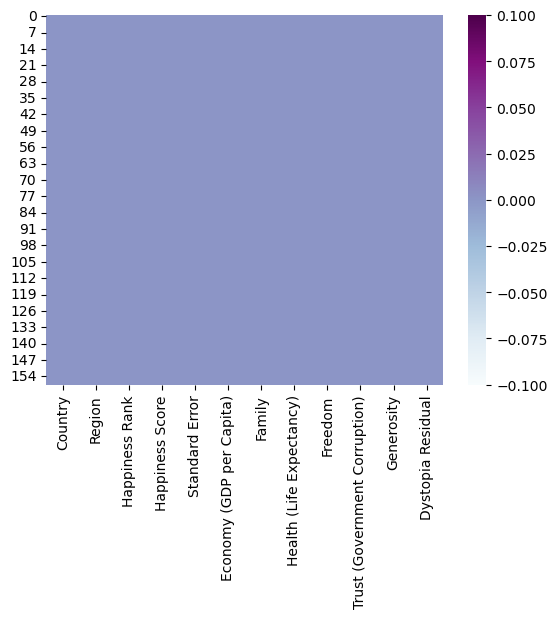

In [122]:
sns.heatmap(whr.isnull(),cmap="BuPu")

In [123]:
#there is none null values present in given dataset

In [124]:
whr.nunique().to_frame('Unique values')

,Unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [125]:
# from above we can see that there might be a atleast 1 duplicate value in Happiness rank, happiness score, standard error, 
# health, and trust columns

In [126]:
whr.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [127]:
# we can see that there is no missing value in dataset

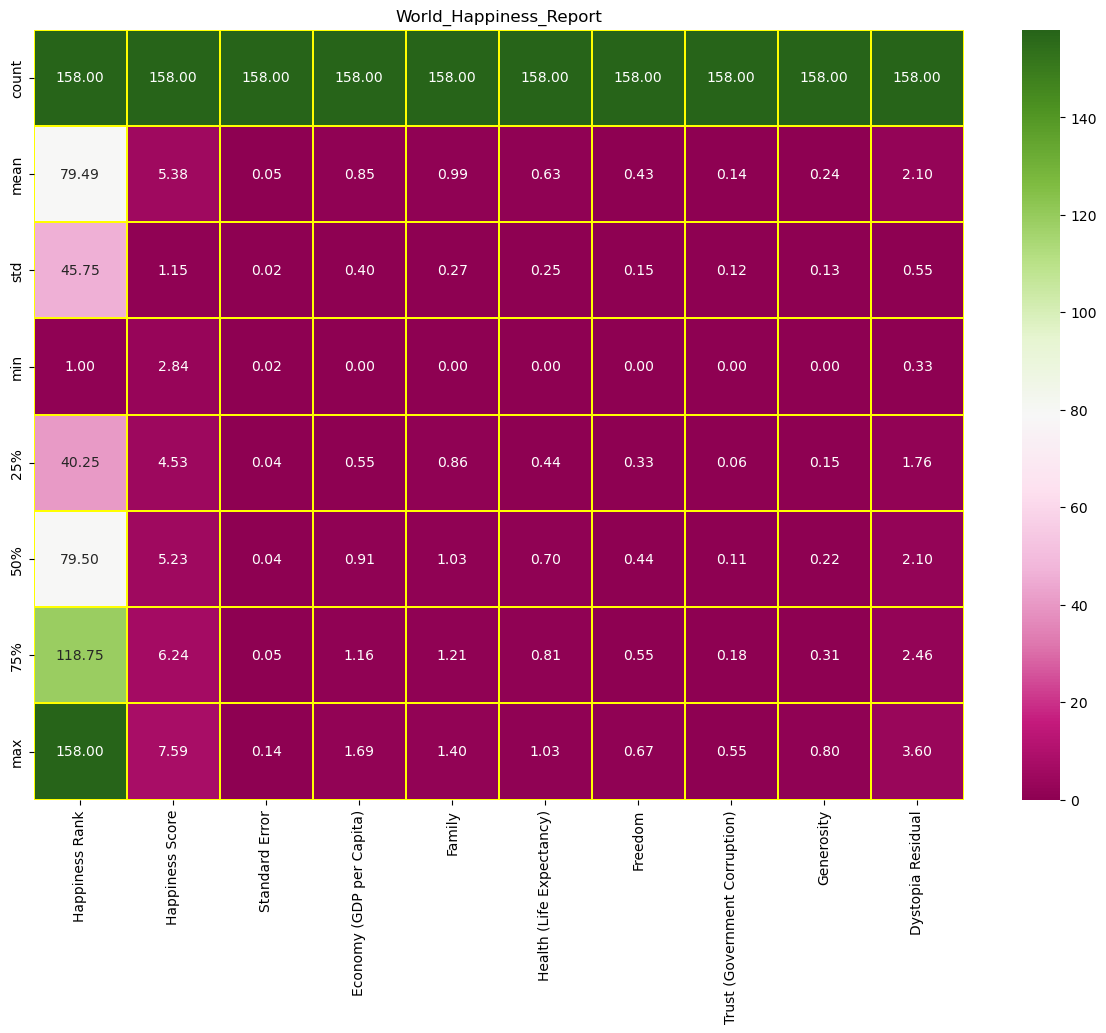

In [128]:
#Let's see above info in graph to get better idea of data
plt.figure(figsize = (15,10))
sns.heatmap(whr.describe(),annot = True,fmt='0.2f',linewidth =0.3, linecolor='yellow',cmap= 'PiYG')
plt.xlable = ('Data')
plt.ylable = ('Column_Name')
plt.title('World_Happiness_Report')
plt.show()

In [129]:
# now we need to check for blank values in our target column 'Happiness Score'
whr.loc[whr['Happiness Score']==' ']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [130]:
# we can see that there is no blank values in our target variable

# now we will need to check relationship of our target variable with other columns
#now we will take country and region column off 


In [141]:
whr1= whr[whr.columns[2:]]
whr1.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


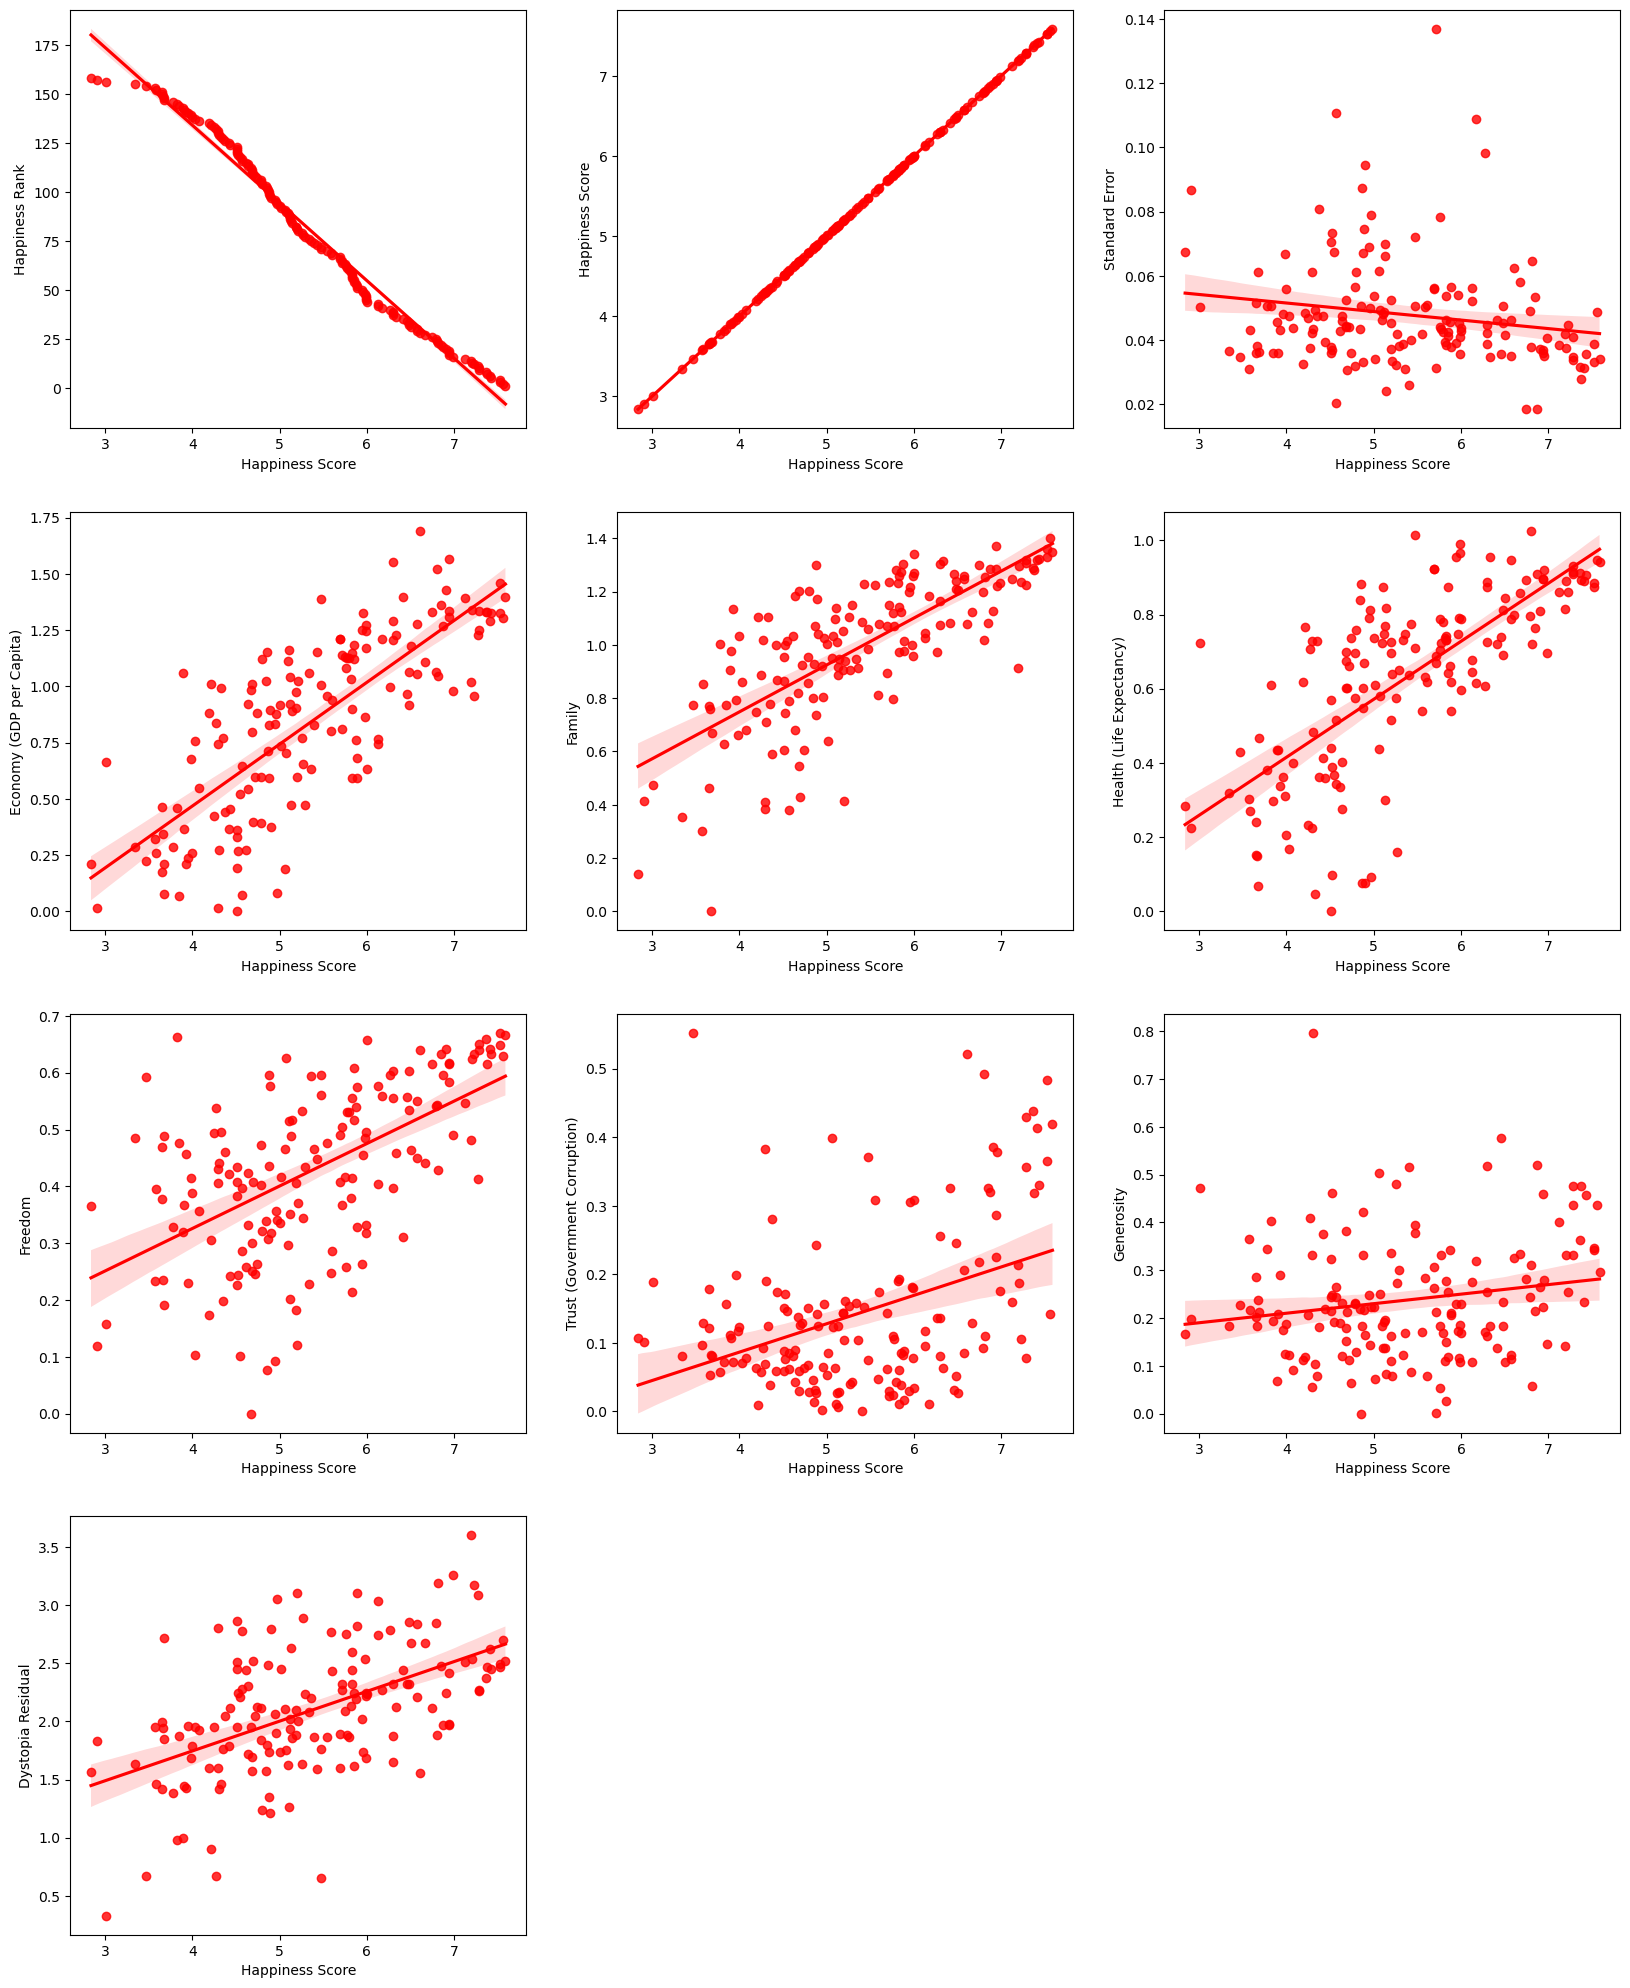

In [142]:
plt.figure(figsize=(20,25))
p=1
for i in whr1:
    if p<=10:
        plt.subplot(4,3,p)
        sns.regplot(x= 'Happiness Score', y = i, data = whr1, color= 'red')
        #plt.xlable('Happiness Score')
        #plt.ylable(i)
    p+=1
plt.show()

In [143]:
# from above chart we can see that 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)' has very siginificant impact
# on Happiness score.

In [144]:
# now we will check for outliners in our dataset

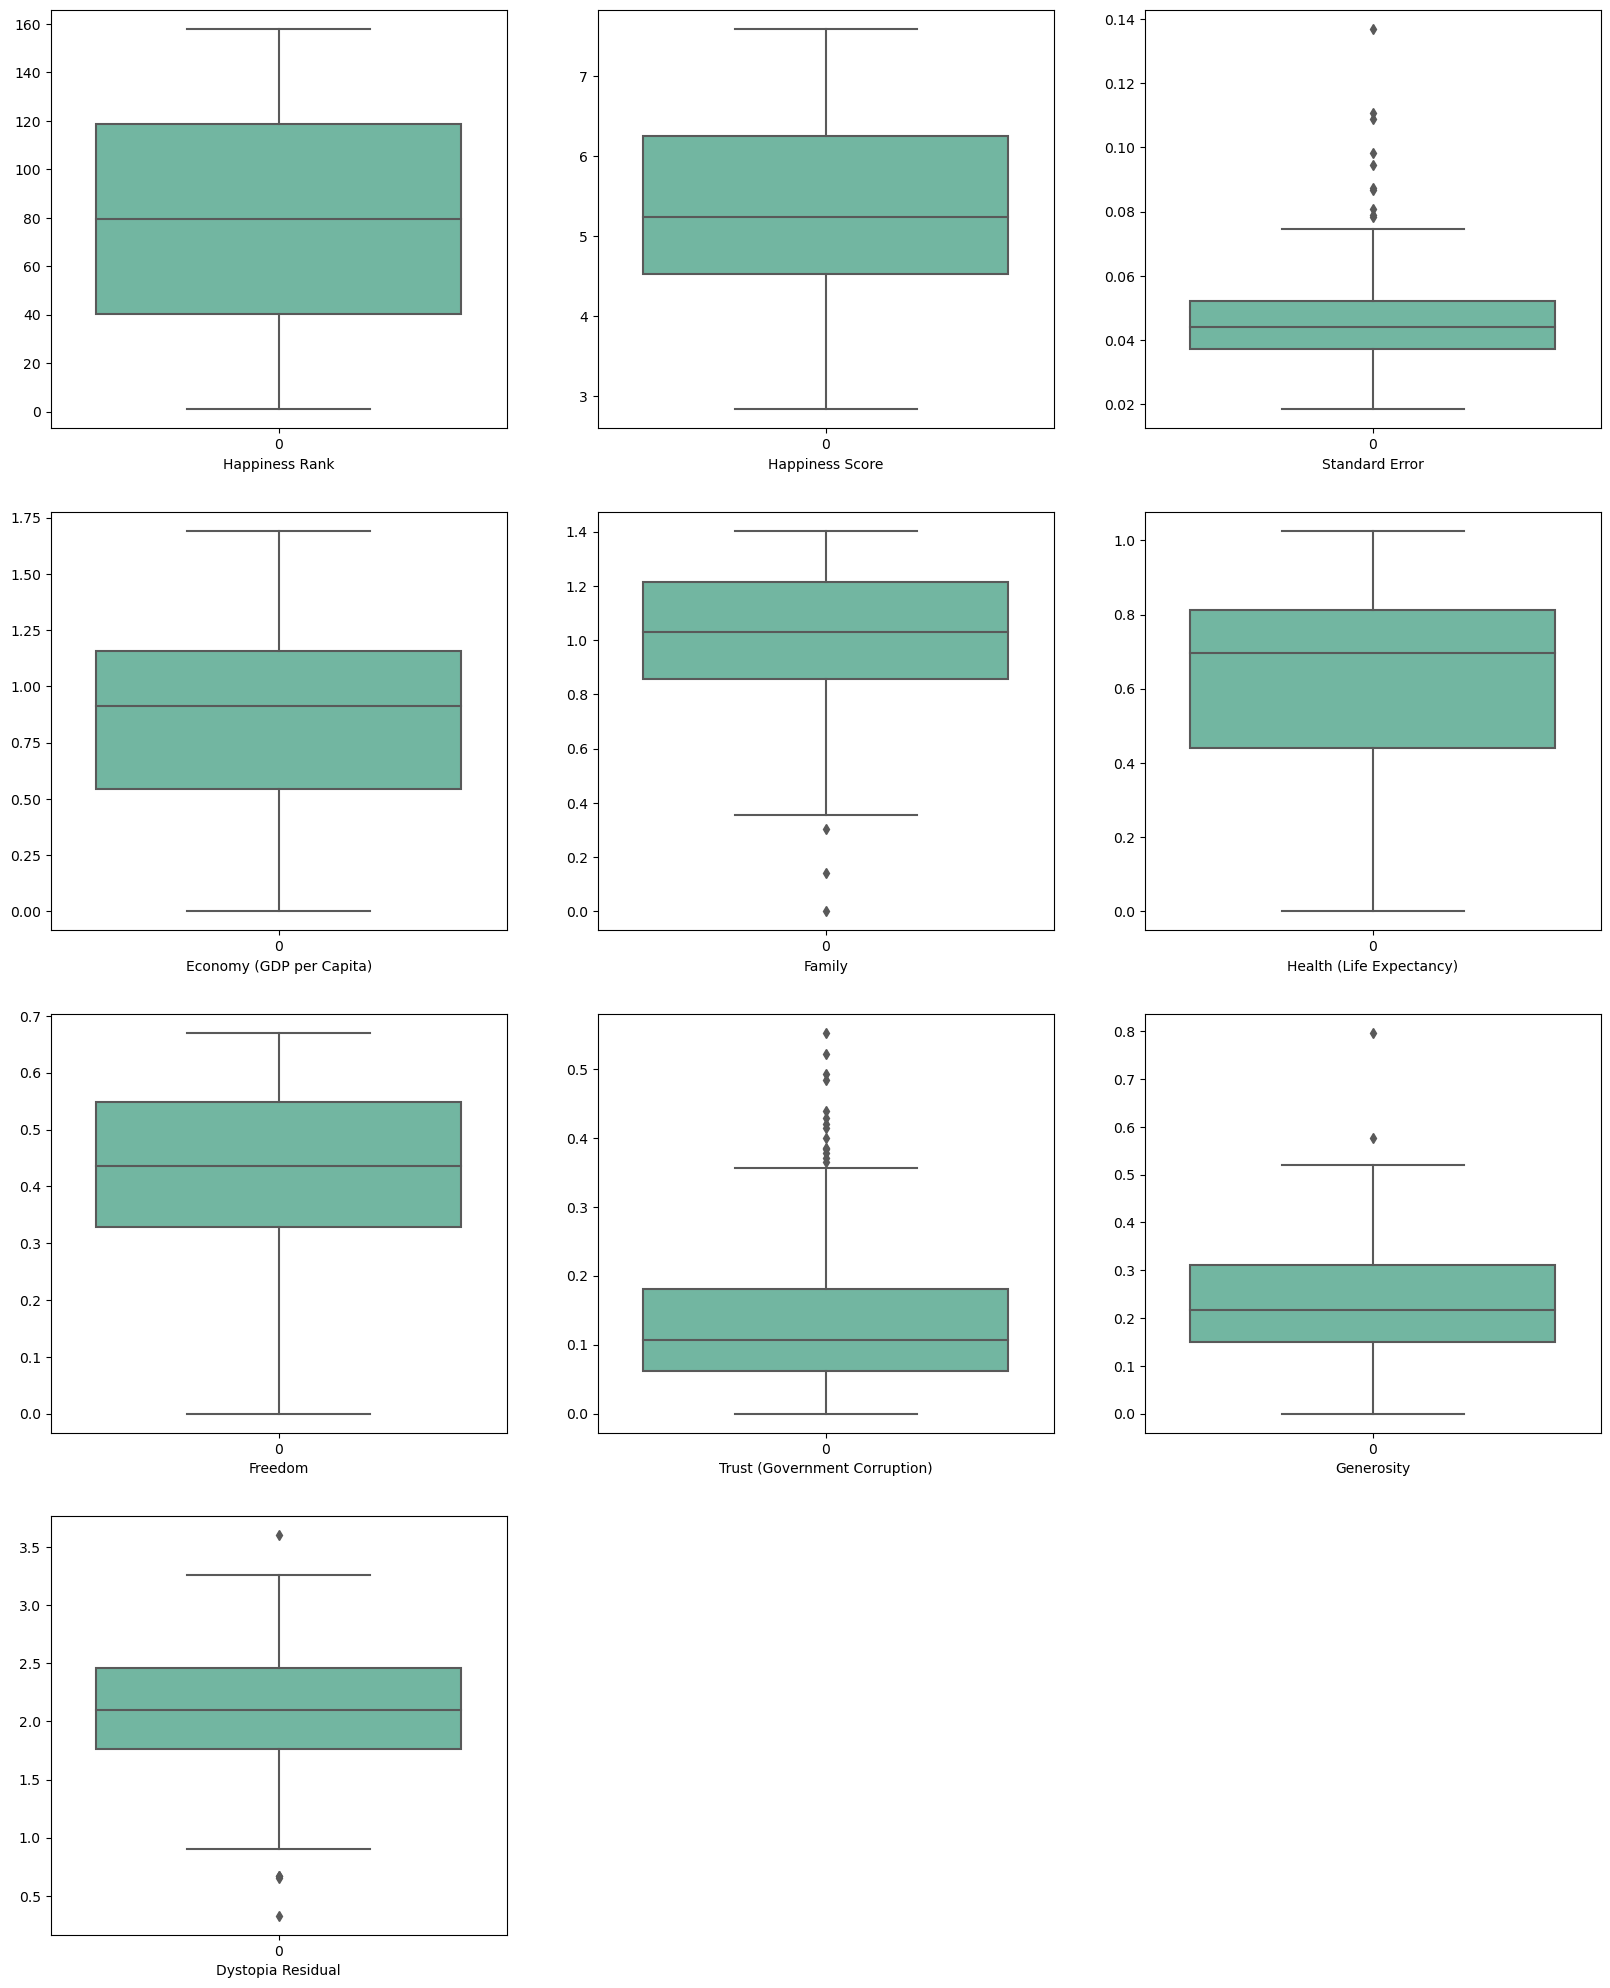

In [145]:
plt.figure(figsize=(20,25))
p = 1
for i in whr1:
    if p<=10:
        plt.subplot(4,3,p)
        sns.boxplot(whr1[i], palette = 'Set2')
        plt.xlabel(i)
    p+=1
plt.show()

In [62]:
# from above we can see that we have high number of outliners present in 'Trust' and 'Standard Error' columns
# 'Generosity' and 'Family' columns has low numbers of outliners 

In [146]:
# We will now clean outliners with zscore method

from scipy.stats import zscore

In [147]:
# we will remove outliners only from 4 columns where we have found it
z_score = zscore(whr1[['Standard Error','Family','Trust (Government Corruption)', 'Generosity']]) 
abs_score=np.abs(z_score)
whr_new = whr1[(abs_score<3).all(axis=1)]
whr_new.shape

(150, 10)

In [148]:
whr1.shape

(158, 10)

In [149]:
# let's see how much data loss we have after zscore method

In [150]:
print('Data loss after Z_score : ', 8/158*100,'%')

Data loss after Z_score :  5.063291139240507 %


In [151]:
# we have 5.06% data loss 
# now we will transfer our whr_new to whr1

In [152]:
whr1= whr_new

In [153]:
whr1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [154]:
# now let's check skew in our dataset
whr1.skew()

Happiness Rank                   0.003564
Happiness Score                  0.138125
Standard Error                   1.240644
Economy (GDP per Capita)        -0.381407
Family                          -0.798605
Health (Life Expectancy)        -0.755919
Freedom                         -0.391806
Trust (Government Corruption)    1.266162
Generosity                       0.644088
Dystopia Residual               -0.195486
dtype: float64

In [155]:
# when we apply skewness threshold of +/- 0.5 following columns have more skewness
# - Standard Error
# - Family
# - Health
# - Trust
# - Generosity

#We will have better idea if we know how data is been distrubuted

plt.figure(figsize=(20,15), facecolor= 'orange')
p = 1
for x in whr1:
    if p<=10:
        x1= plt.subplot(4,3,p)
        sns.distplot(whr1[x])
        plt.xlabel(x, fontsize=10)
        p+=1
plt.show()

#we can see that our data is not distributed evenly

#let's check for Correlations
whr1.corr()

In [167]:
x = whr1.drop(columns = ['Dystopia Residual'],axis=1)
y = whr1['Dystopia Residual']

In [178]:
y

0      2.51738
1      2.70201
2      2.49204
3      2.46531
4      2.45176
        ...   
151    1.46494
152    1.95210
154    1.63328
155    0.32858
156    1.83302
Name: Dystopia Residual, Length: 150, dtype: float64

In [168]:
from sklearn.preprocessing import power_transform

In [169]:
x= power_transform(x,method ='yeo-johnson')
x

array([[-2.05217049,  1.83677722, -0.95587188, ...,  1.75236602,
         1.82100223,  0.64317571],
       [-1.99674266,  1.81672868,  0.37543673, ...,  1.44286025,
         0.32242403,  1.54095919],
       [-1.94636164,  1.79046642, -1.0469993 , ...,  1.61491101,
         1.95902436,  0.95888099],
       ...,
       [ 1.5479157 , -1.97446875, -0.69801833, ...,  0.32866784,
        -0.44172743, -0.32195512],
       [ 1.56526652, -2.34067064,  0.4712653 , ..., -1.64795347,
         0.75496254,  1.73195492],
       [ 1.5825864 , -2.4543225 ,  2.18536878, ..., -1.83215124,
        -0.15481023, -0.18334989]])

In [179]:
pd.DataFrame(x).skew().sort_values()

0   -0.266570
5   -0.190102
4   -0.152475
3   -0.137234
6   -0.077847
2   -0.032706
1   -0.022306
8    0.027062
7    0.170931
dtype: float64

#all our data is in range of +/- 0.5

In [180]:
 # LinearRegression

In [182]:
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.linear_model import LinearRegression # model selection
lr = LinearRegression() 
from sklearn.metrics import r2_score

In [185]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size= 0.3)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random state',i,'Model Training accuracy is:', r2_score(y_train,pred_train))
    print('At random state',i,'Model test accuracy is    :', r2_score(y_test,pred_test),'\n')
    

At random state 0 Model Training accuracy is: 0.970533465544527
At random state 0 Model test accuracy is    : 0.9734100964048545 

At random state 1 Model Training accuracy is: 0.974305643585562
At random state 1 Model test accuracy is    : 0.9595332421117748 

At random state 2 Model Training accuracy is: 0.9745181988387628
At random state 2 Model test accuracy is    : 0.9631686937008695 

At random state 3 Model Training accuracy is: 0.9657993974068839
At random state 3 Model test accuracy is    : 0.9814921499870061 

At random state 4 Model Training accuracy is: 0.9748741087020278
At random state 4 Model test accuracy is    : 0.9578652580398808 

At random state 5 Model Training accuracy is: 0.9749242367604612
At random state 5 Model test accuracy is    : 0.9614570336151899 

At random state 6 Model Training accuracy is: 0.9724105228523134
At random state 6 Model test accuracy is    : 0.9664101239096491 

At random state 7 Model Training accuracy is: 0.9700734243328282
At random sta

 so on Model 22 we are getting better result

In [200]:
x_train,xtest,y_train,y_test = train_test_split(x,y,random_state = 99, test_size= 0.3)

In [201]:
lr.fit(x_train,y_train)

LinearRegression()

In [202]:
print('Train data score :', lr.score(x_train,y_train))
print('Test data score :', lr.score(x_test,y_test))

Train data score : 0.9747881591212864
Test data score : 0.9615051848886673


### I have try to use model 22, 98 where train and test data result is more closer (0.970 & 0.971) but in both when I use is Test data score came back in -ve and far off from actual hence I have use model 99

In [203]:
# now cross validation score

In [204]:
 from sklearn.model_selection import cross_val_score

In [209]:
for i in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv =i)
    cv_mean = cv_score.mean()
    print('At cross', i, 'CVS for training is',r2_score(y_train,pred_train))
    print('Accuracy for test data is', r2_score(y_test,pred_test))

At cross 2 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 3 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 4 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 5 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 6 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 7 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 8 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005
At cross 9 CVS for training is 0.9747881591212864
Accuracy for test data is 0.9649353775231005


In [210]:
# from above results we can say that LR and CVS both has very similar result.

In [211]:
# Now we will see best fit line with use of scatter plot

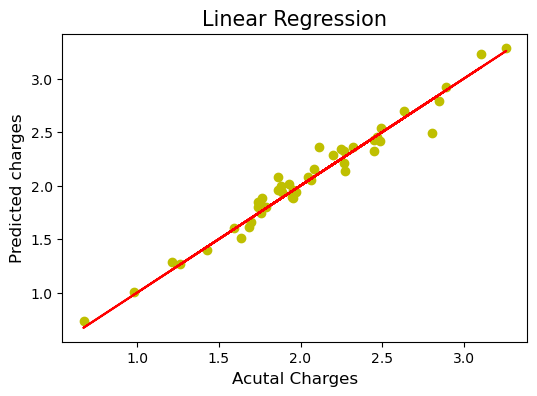

In [215]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test, color='r')
plt.xlabel('Acutal Charges', fontsize=12)
plt.ylabel('Predicted charges', fontsize=12)
plt.title('Linear Regression', fontsize= 15)
plt.show()

In [216]:
# from above graph we can see that both actual and predicted charges are very close

 so with use of Linear Regression we have got 
 Training score - 97%
 testing score - 96%
 from above score we can say that our Model is ready for testing 

In [219]:
import pickle
file_name = ('World_Happiness_Project')
pickle.dump(lr,open(file_name,'wb'))

In [220]:
# Conclusion

In [221]:
loaded_model = pickle.load(open('World_Happiness_Project','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

96.15051848886674


In [228]:
conclusion = pd.DataFrame([loaded_model.predict(x_train)[:],pred_test[:]], index =['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
Predicted,2.979394,2.005388,3.580406,1.908710,2.858638,2.322274,1.833481,1.496534,2.408584,1.884562,...,1.449877,1.924046,1.590319,2.779812,2.671125,0.514289,1.715402,0.64844,1.676917,1.590232
Original,1.005743,2.327882,2.925168,1.803413,2.422827,1.797818,1.998224,1.879627,2.794405,2.080044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# not sure why there are NaN values in original. Please let me know where I have made mistake